# Santander Product Recommendation: Exploratory Data Analysis

Now that we have cleaned the data, the next step is to perform some exploratory data analysis and see if we can identify some trends or insights that could help inform our analysis down the road. 

In [2]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Import data
df = pd.read_csv("Data/train_ver2_CLEAN")
df.head()

,index,date,customer_code,employee_index,customer_country,sex,age,first_contract_date,new_customer_index,customer_seniority,...,deceased_index,province_name,activity_index,household_gross_income,segmentation,month,month_id,month_next_id,variable,value
0,265696,2015-03-28,118972.0,N,ES,V,44.0,2000-05-23,0.0,182.0,...,N,MADRID,1.0,172178.94,01 - TOP,3.0,3,4,gurantees,Added
1,2484859,2015-02-28,116132.0,N,ES,V,45.0,1998-12-22,0.0,199.0,...,N,VALENCIA,1.0,92877.72,02 - PARTICULARES,2.0,2,3,current_accounts,Added
2,2998969,2015-02-28,1340674.0,N,ES,H,23.0,2014-10-24,0.0,9.0,...,N,MADRID,1.0,259009.38,03 - UNIVERSITARIO,2.0,2,3,current_accounts,Dropped
3,2392444,2015-02-28,190613.0,N,ES,H,38.0,2000-11-29,0.0,175.0,...,N,MADRID,1.0,68797.14,02 - PARTICULARES,2.0,2,3,current_accounts,Dropped
4,2377004,2015-02-28,171133.0,N,ES,H,43.0,2003-05-22,0.0,146.0,...,N,MADRID,1.0,144579.54,02 - PARTICULARES,2.0,2,3,current_accounts,Dropped


In [4]:
#Take a quick look at the data
df.describe()

,index,customer_code,age,new_customer_index,customer_seniority,primary_customer_index,customer_type,activity_index,household_gross_income,month,month_id,month_next_id
count,3.996400e+04,3.996400e+04,39964.000000,39964.000000,39964.000000,39964.000000,39964.0,39964.000000,3.996400e+04,39964.000000,39964.000000,39964.000000
mean,4.521113e+06,7.398878e+05,43.721324,0.045716,89.583875,1.304074,1.0,0.920579,1.361707e+05,4.771269,4.771269,5.771269
std,1.844852e+06,4.693269e+05,13.961988,0.208871,74.437343,5.450459,0.0,0.270399,1.546273e+05,1.118397,1.118397,1.118397
min,6.881000e+03,1.590000e+04,3.000000,0.000000,1.000000,1.000000,1.0,0.000000,8.394480e+03,2.000000,2.000000,3.000000
25%,3.118141e+06,2.669010e+05,34.000000,0.000000,19.000000,1.000000,1.0,1.000000,7.894885e+04,4.000000,4.000000,5.000000
50%,4.800943e+06,7.959795e+05,43.000000,0.000000,66.000000,1.000000,1.0,1.000000,1.026152e+05,5.000000,5.000000,6.000000
75%,6.130691e+06,1.200692e+06,51.000000,0.000000,163.000000,1.000000,1.0,1.000000,1.575069e+05,6.000000,6.000000,7.000000
max,6.999800e+06,1.399128e+06,110.000000,1.000000,246.000000,99.000000,1.0,1.000000,1.113990e+07,6.000000,6.000000,7.000000


As you can see, there doesn't seem to be anything that sticks out about this dataset by performing the describe method. The best place to start is by plotting some of these values and see if we can get some interesting insights from that.

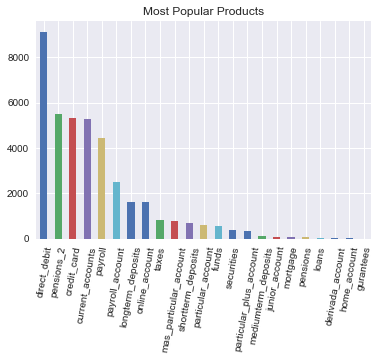

In [29]:
#Top products overall
df.variable.value_counts().plot(kind='bar')
plt.title('Most Popular Products')
plt.xticks(rotation=80)
plt.show()

Top 5 products overall: 

1. Direct Debit
2. Pensions
3. Credit Card
4. Current Accounts
5. Payroll

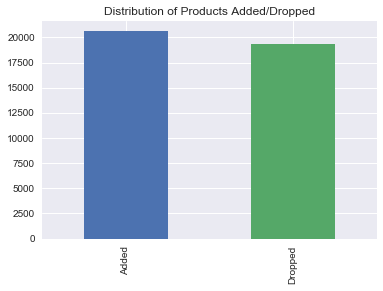

In [6]:
#The database is nearly split in half between customers that added and dropped products
sns.set()
df.value.value_counts().plot(kind='bar')
plt.title('Distribution of Products Added/Dropped')
plt.show()

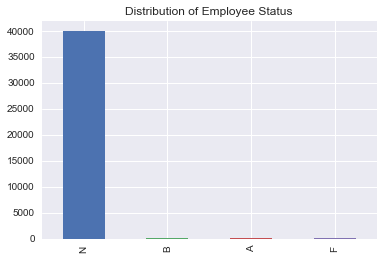

In [7]:
#Nearly every customer of the bank is not an employee
df.employee_index.value_counts().plot(kind='bar')
plt.title('Distribution of Employee Status')
plt.show()

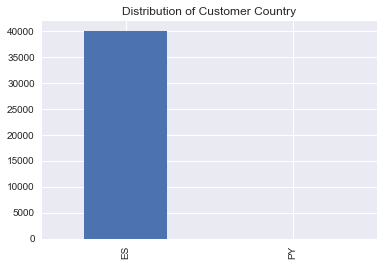

In [8]:
#Nearly every customer is from Spain
df.customer_country.value_counts().plot(kind='bar')
plt.title('Distribution of Customer Country')
plt.show()

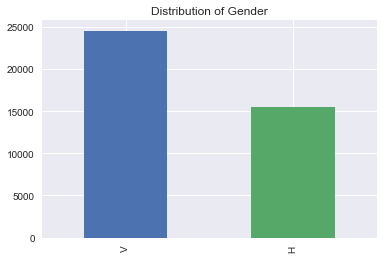

In [9]:
#Majority women
df.sex.value_counts().plot(kind='bar')
plt.title('Distribution of Gender')
plt.show()

Interestingly, there's a pretty large majority of women customers in the dataset. Let's take a deeper look into which products the female customers have.

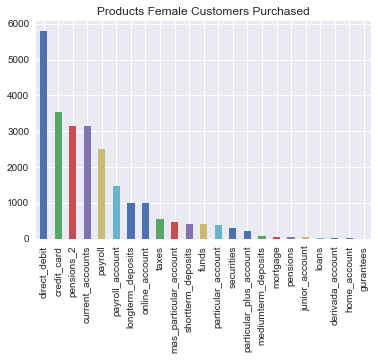

In [10]:
women = df[df.sex == 'V']

women.variable.value_counts().plot(kind='bar', title='Products Female Customers Purchased')
plt.show()

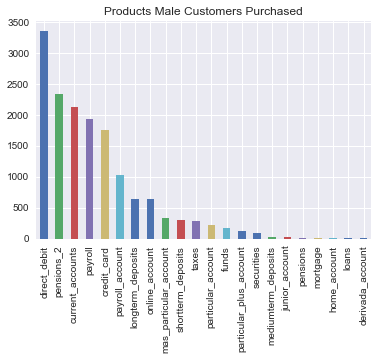

In [11]:
men = df[df.sex == 'H']
men.variable.value_counts().plot(kind='bar', title='Products Male Customers Purchased')
plt.show()

Top 5 products for female customers:
1. Direct Debit
2. Credit Card
3. Pensions
4. Current Accounts
5. Payroll

Top 5 products for male customers:

1. Direct Debit
2. Pensions
3. Current Accounts
4. Payroll
5. Credit Card

Interestingly, female customers are more privy to credit cards than the male customers. This could offer a helpful clue as to whether we should think about using customer gender to inform our recommendations.

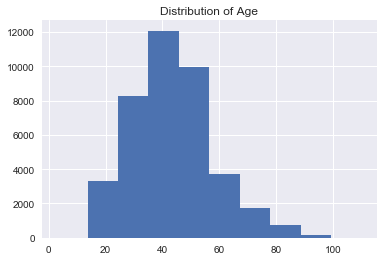

In [12]:
#Customers are mostly between 35 and 55
plt.hist(df.age)
plt.title('Distribution of Age')
plt.show()

I would also like to take a closer look at the sort of products the customers between 35-55 have. It appears as though a pretty large majority of the bank's customers are in that age range. We need to figure out what services they are interested in, because it could help inform our recommendations for future customers.

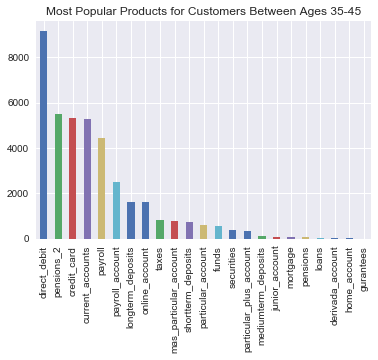

In [30]:
thirtyfive_to_fiftyfive = df[(df.age >= 35) | (df.age <= 45)]

thirtyfive_to_fiftyfive.variable.value_counts().plot(kind='bar')
plt.title('Most Popular Products for Customers Between Ages 35-45')
plt.show()

As we can see, Direct Debit is the clear winner here. The rest of the top five products for this age range seems to be as expected.

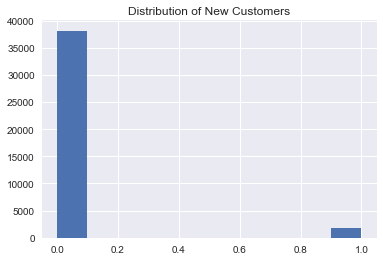

In [14]:
#The vast majority of customers are new
plt.hist(df.new_customer_index)
plt.title('Distribution of New Customers')
plt.show()

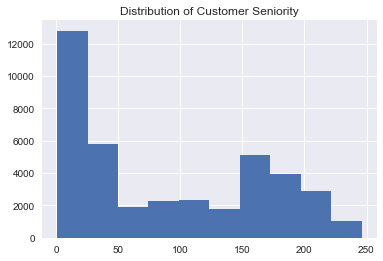

In [15]:
#As expected, most customers are new, however there are quite a few loyal customers as well
plt.hist(df.customer_seniority)
plt.title('Distribution of Customer Seniority')
plt.show()

A significant amount of customers seem to be very loyal to Santander. I would like to take a look at the different products these customers who have been with the bank for so long have. I'm interested in seeing if those customers share some of the same products or not.

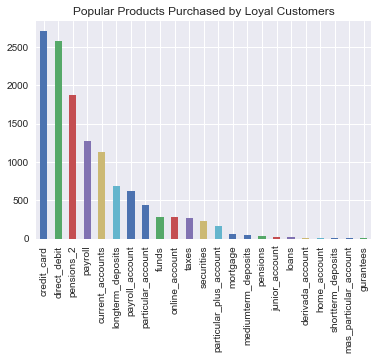

In [16]:
loyal = df[df.customer_seniority >= 150]

loyal.variable.value_counts().plot(kind='bar')
plt.title('Popular Products Purchased by Loyal Customers')
plt.show()

As we can see, the loyal customers that we have filtered here in the dataset have a slightly different top 5 than the rest of the groups we filtered.

Top 5 products purchased by loyal customers:

1. Credit Card
2. Direct Debit
3. Pensions
4. Payroll
5. Current Accounts

Also notice that the number of loyal customers that have a credit card and direct debit account is much more even. According to our graph of most popular products overall, direct debit is far and away the most popular product. Credit card actually comes in as the third most popular product.

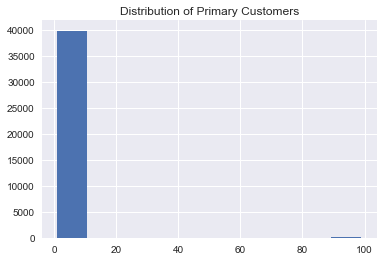

In [17]:
#Vast majority of customers are primary (Customers through the entire month)
plt.hist(df.primary_customer_index)
plt.title('Distribution of Primary Customers')
plt.show()

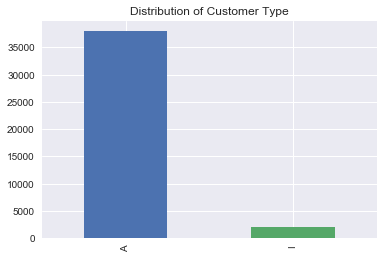

In [18]:
#Vast majority of customers are active at the beginning of the month
df.customer_relation_type.value_counts().plot(kind='bar')
plt.title('Distribution of Customer Type')
plt.show()

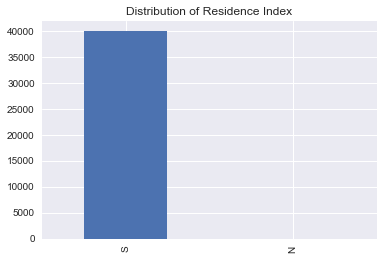

In [19]:
#Vast majority of customers live in same country as the bank
df.residence_index.value_counts().plot(kind='bar')
plt.title('Distribution of Residence Index')
plt.show()

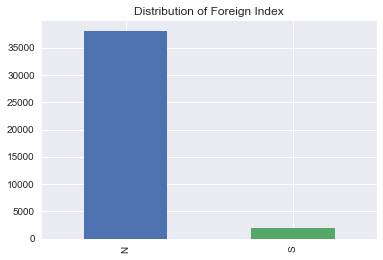

In [20]:
#Majority of customers are not from another country
df.foreign_index.value_counts().plot(kind='bar')
plt.title('Distribution of Foreign Index')
plt.show()

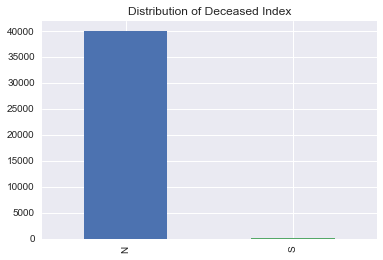

In [21]:
#Vast majority of customers are still alive
df.deceased_index.value_counts().plot(kind='bar')
plt.title('Distribution of Deceased Index')
plt.show()

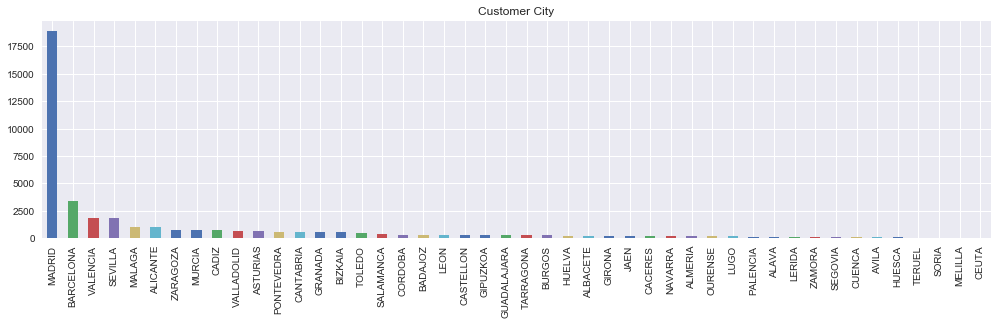

In [22]:
#Most customers are from Barcelona, Valencia, Sevilla and Malaga, but the vast majority are from Madrid
df.province_name.value_counts().plot(kind='bar', figsize=(17,4))
plt.title('Customer City')
plt.show()

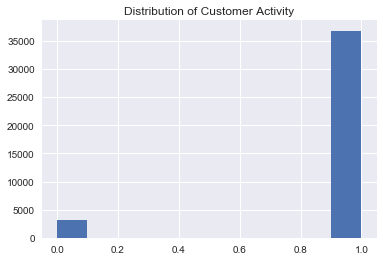

In [23]:
#Most customers are active
plt.hist(df.activity_index)
plt.title('Distribution of Customer Activity')
plt.show()

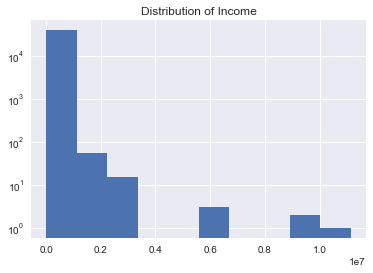

In [24]:
plt.hist(df.household_gross_income, log=True)
plt.title('Distribution of Income')
plt.show()

Interestingly, while most customers are in the lower end of household gross income, there are some pretty significant outliers here.

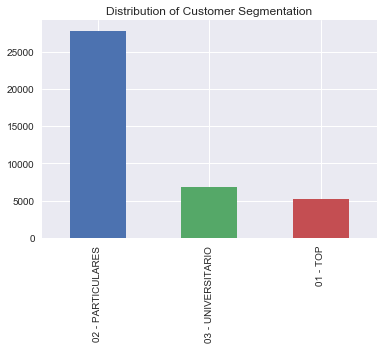

In [25]:
#Most customer accounts are labelled as individual accounts
df.segmentation.value_counts().plot(kind='bar')
plt.title('Distribution of Customer Segmentation')
plt.show()

Now that we have an idea of what our data looks like and what we are dealing with, it is now time to move on and perform some recommendations for customers.